In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px


In [3]:
df = pd.read_csv('../../Combine_Data/men/pb_encoded.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         485 non-null    int64  
 1   D            485 non-null    float64
 2   E            485 non-null    float64
 3   ND           485 non-null    float64
 4   Total        485 non-null    float64
 5   year         485 non-null    int64  
 6   medal        485 non-null    int64  
 7   Name         485 non-null    int64  
 8   Nation       485 non-null    int64  
 9   round_final  485 non-null    int64  
 10  round_qual   485 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 41.8 KB


In [6]:
df.describe()

,Rank,D,E,ND,Total,year,medal,Name,Nation,round_final,round_qual
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,77.298969,5.275670,7.964476,-0.028454,13.211557,2018.731959,0.026804,150.296907,42.886598,0.123711,0.876289
std,60.318056,0.798077,0.695207,0.315990,1.299220,0.688084,0.161677,89.017772,24.607445,0.329592,0.329592
min,1.000000,1.700000,4.966000,-4.000000,4.133000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,4.800000,7.633000,0.000000,12.633000,2018.000000,0.000000,74.000000,19.000000,0.000000,1.000000
50%,70.000000,5.300000,8.100000,0.000000,13.400000,2019.000000,0.000000,152.000000,44.000000,0.000000,1.000000
75%,130.000000,5.800000,8.466000,0.000000,14.025000,2019.000000,0.000000,226.000000,69.000000,0.000000,1.000000
max,192.000000,7.000000,9.433000,0.000000,16.433000,2020.000000,1.000000,303.000000,77.000000,1.000000,1.000000


In [7]:
df.duplicated().sum()

0

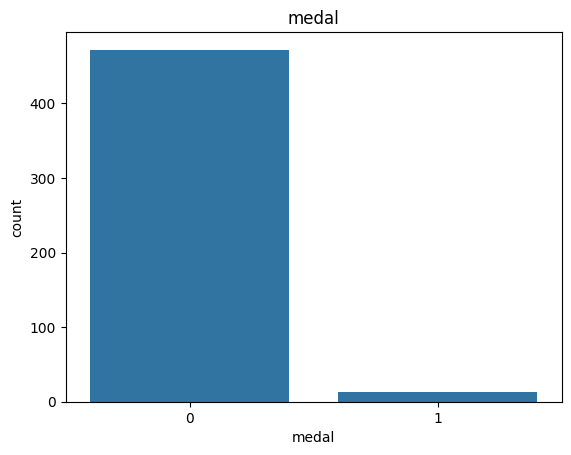

In [8]:
sns.countplot(x='medal', data=df)
plt.title('medal')
plt.show()

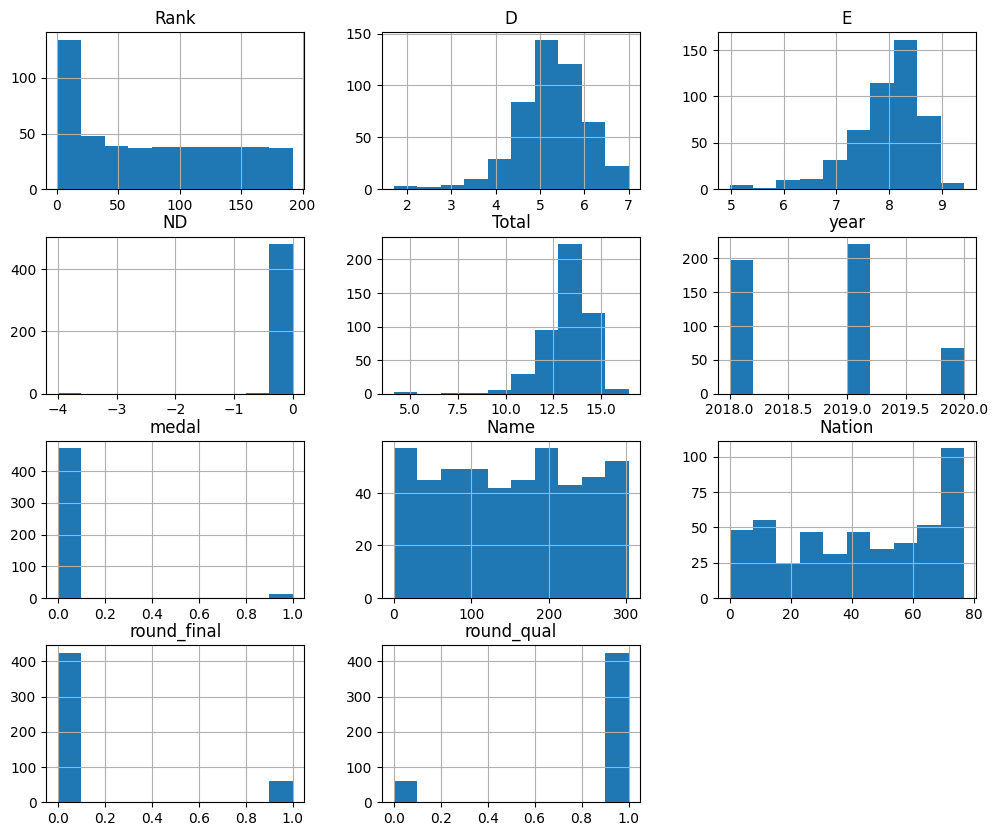

In [9]:
df.hist(figsize=(12, 10))
plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

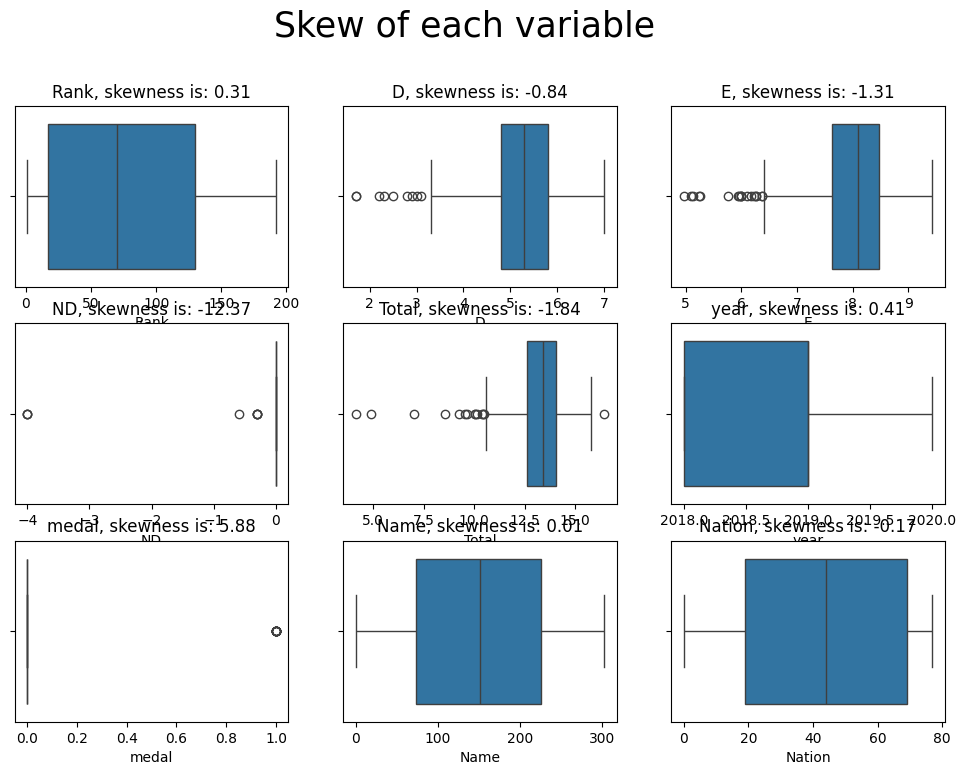

In [10]:
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(12,8))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()

    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis=0, skipna=True),2)))

boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, suptitle='Skew of each variable')
plt.tight_layout()
plt.show()


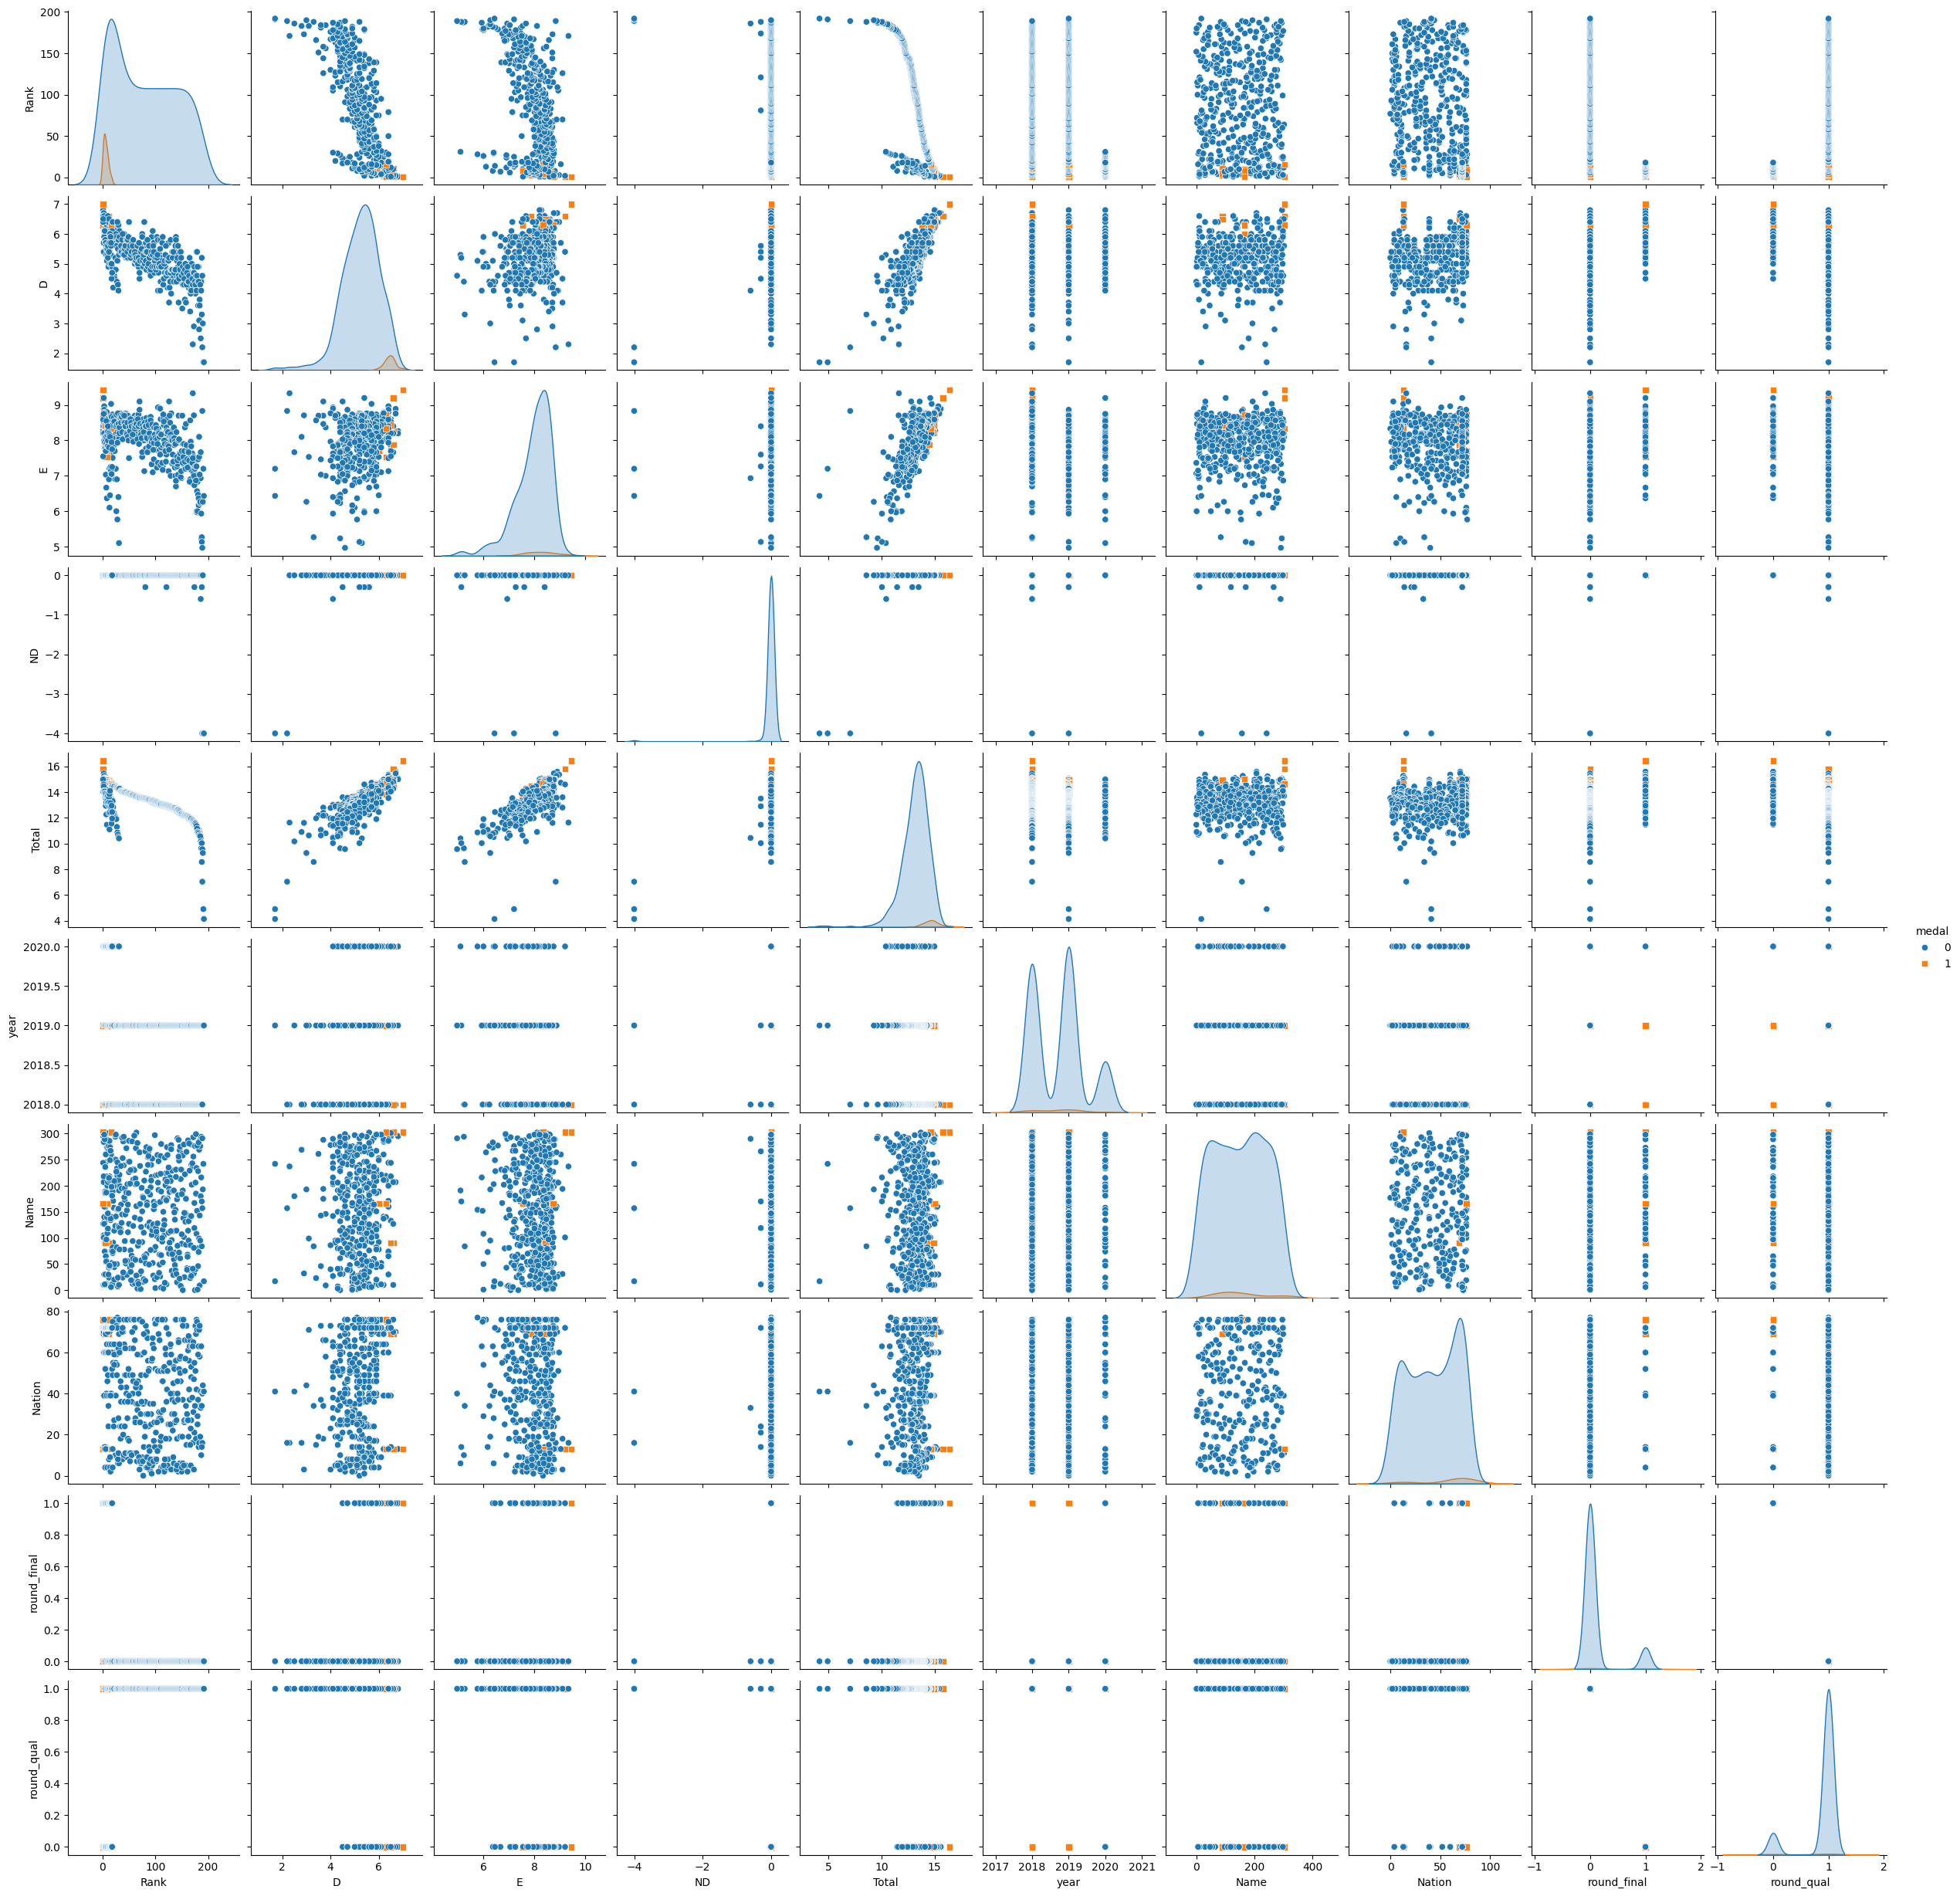

In [11]:
sns.pairplot(df, hue='medal', diag_kind='kde', markers=["o", "s"])
plt.show()


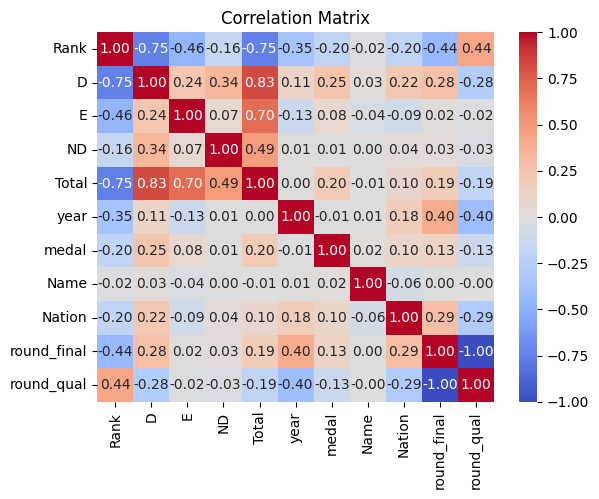

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

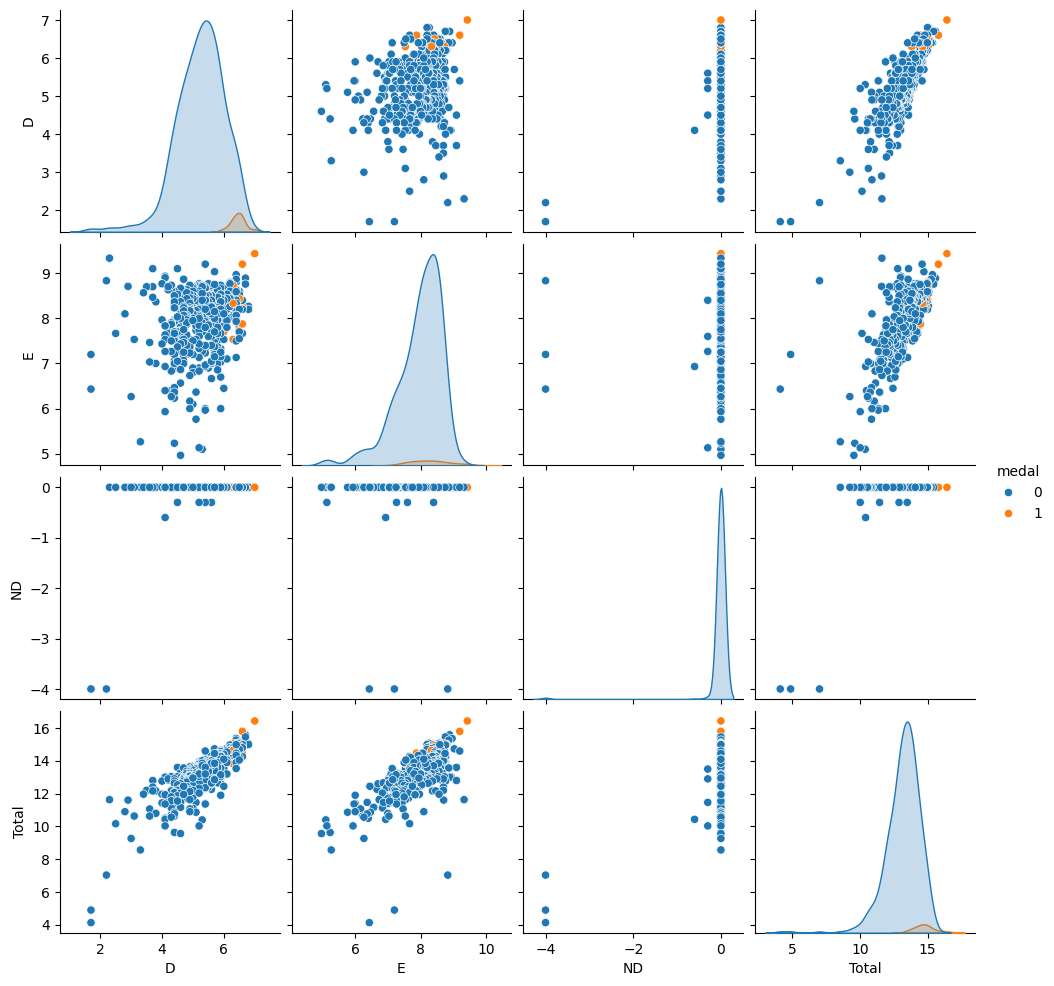

In [13]:
selected_features = ['D', 'E', 'ND', 'Total', 'medal']
sns.pairplot(df[selected_features], hue='medal')
plt.show()